# Import packages

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Analysing data

In [7]:
df.shape

(1338, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [5]:
df['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

# Data Visualisation

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

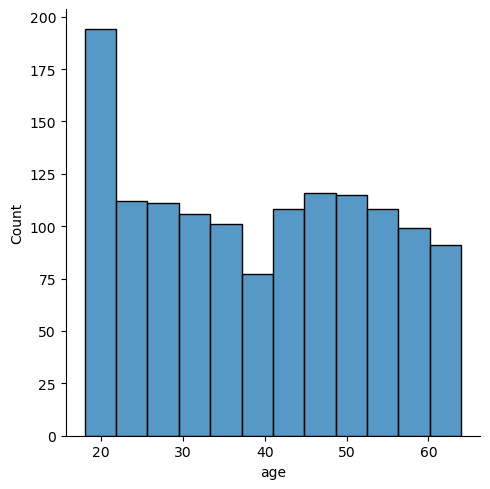

In [11]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='age')

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

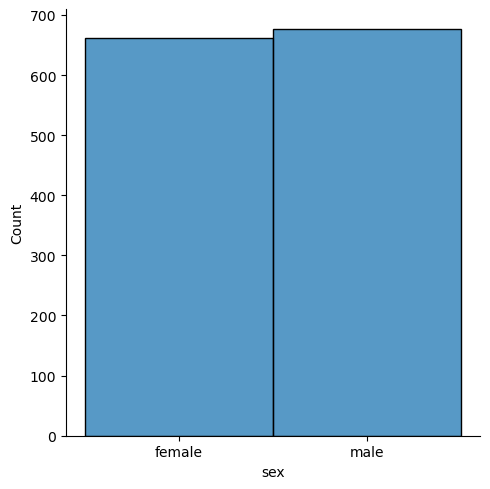

In [13]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='sex')

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

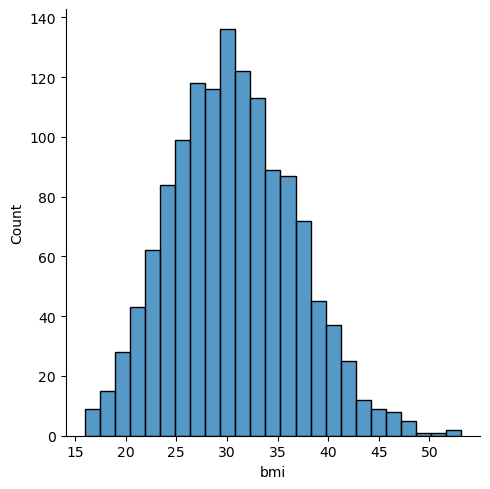

In [14]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='bmi')

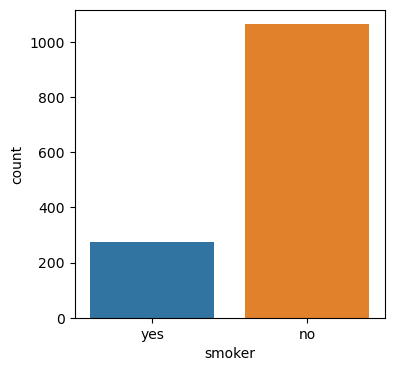

In [15]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='smoker')
plt.show()

# converting data into numerical value

In [17]:
df.replace({'sex':{'male':1,'female':0}},inplace=True)
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


# Train Test Split

In [21]:
x=df.drop("charges" ,axis=1)
y=df["charges"]

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [35]:
x_train.shape

(1070, 6)

In [55]:
x_test

,age,sex,bmi,children,smoker,region
17,23,1,23.845,0,0,3
1091,55,0,29.830,0,0,3
273,50,1,27.455,1,0,3
270,18,1,29.370,1,0,0
874,44,1,21.850,3,0,3
...,...,...,...,...,...,...
232,19,0,17.800,0,0,1
323,57,1,40.945,0,0,3
1337,61,0,29.070,0,1,2
1066,48,1,37.290,2,0,0


In [37]:
lg = LinearRegression()
lg.fit(x_train,y_train) # 80 model will be train
y_pred = lg.predict(x_test) # 20 model will be predicted

In [39]:
y_pred

array([ 1820.75621886, 11893.35566097, 10391.48426582,  2131.62301167,
        8175.83419518, 11016.30531453,  3352.18872713,  1013.79352548,
       12023.09477086,  9453.8581105 , 11467.3225898 ,  4817.664947  ,
       29808.20461479,  -513.75717634, 12754.46439804, 13119.43189556,
        4118.83414354,  7731.48626043, 29297.74067135,  2699.14570484,
       12329.22054394,  2214.5652979 , 34452.34192694, 32066.24540146,
       30224.63592129,  8944.2429203 ,  2230.70212755, 15188.75659902,
        6532.69778856,  1906.71098074,  9402.89455638,  5634.95908593,
        4371.49314151,  4823.49011099,  9453.52337493,  4528.76526399,
       29818.9763023 ,  6751.3046149 , 27557.85321987, 13878.30367427,
         117.41861964, 28385.96859962,  7697.94328125,  1430.2691451 ,
       10187.26558274,  7986.59837739, 11431.85182879,  8096.73882633,
       10698.62941741, 13781.02808991,  6083.58400067,  -813.98261125,
       26175.82891349, 37020.38968178,  7319.63150011, 17878.3155211 ,
      

In [40]:
r2_score(y_test,y_pred)

0.7454471618659975

# Prediction System

In [53]:
age=int(input("Enter Your Age"))
gender=int(input("Your gender male(1) or female(0)"))
smoker=int(input("Smoker: yes(1) or no(0)"))
bmi=float(input("Enter Your bmi"))
child=int(input("Enter No of children"))
region=int(input("southeast':0,'southwest':1,'northwest':2,'northeast':3"))

Enter Your Age23
Your gender male(1) or female(0)0
Smoker: yes(1) or no(0)1
Enter Your bmi23.2
Enter No of children2
southeast':0,'southwest':1,'northwest':2,'northeast':31


In [54]:
input_df = (age,gender,smoker,bmi,child,region)
np_df = np.asarray(input_df)
input_df_reshaped = np_df.reshape(1,-1)
prediction = lg.predict(input_df_reshaped)
print("Your Predict charges are ",prediction[0])

Your Predict charges are  55023.179537712174


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
